# Import Librlies


This section imports essential libraries for data manipulation, visualization, and machine learning.


In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score ,classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline

# Read Data

Loading the flight data from a CSV file into a pandas DataFrame for analysis.

In [7]:
df=pd.read_csv("/kaggle/input/flightsdata/flights.csv")


In [8]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory data analysis (EDA)

This section inspects the basic structure and details of the dataset.


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [10]:
df.sample(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
970259,2015,3,5,4,UA,1550,N16713,EGE,EWR,1224,...,1959.0,91.0,0,0,NaN,86.0,0.0,0.0,5.0,0.0
67663,2015,1,5,1,US,2066,N118US,RSW,CLT,1020,...,1204.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
342157,2015,1,23,5,UA,763,N413UA,DEN,SAN,1117,...,1216.0,-28.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing

### Handling Missing Data

This section deals with missing values in the dataset. The focus is on cleaning the data and handling columns with NaN values.

In [11]:
df["DEPARTURE_TIME"].dropna()

df=df.drop(["TAIL_NUMBER"],axis=1)

df_cleaned = df.dropna(subset=['ARRIVAL_TIME'])

columns_to_fill = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

df_cleaned[columns_to_fill] = df[columns_to_fill].fillna(0)


/tmp/ipykernel_30/3585109478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_to_fill] = df[columns_to_fill].fillna(0)


## Data Visualization

This part visualizes the distribution of airline data and computes descriptive statistics for the DataFrame df

### AIRLINE

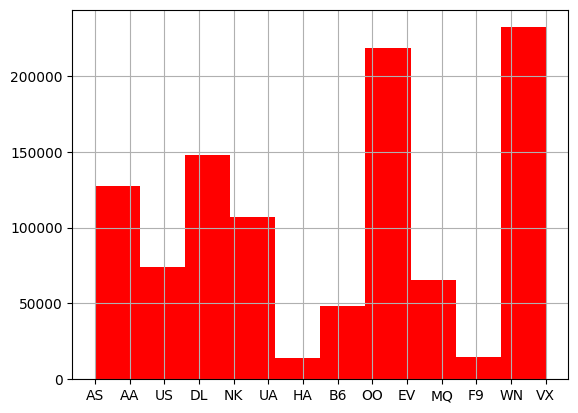

In [12]:
a=df["AIRLINE"]

a=list(a)

plt.hist(a,color="red")

plt.grid()

plt.show()

df.columns

df_describe=df.describe()

## Plot distribution of delays

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


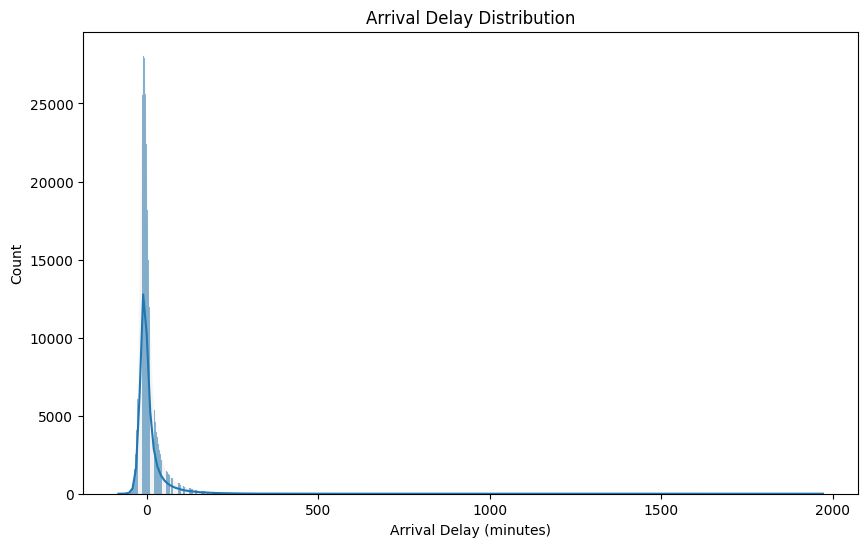

In [13]:
plt.figure(figsize=(10, 6))

sns.histplot(df['ARRIVAL_DELAY'], kde=True)

plt.title('Arrival Delay Distribution')

plt.xlabel('Arrival Delay (minutes)')

plt.show()

## Boxplot of delay per airline

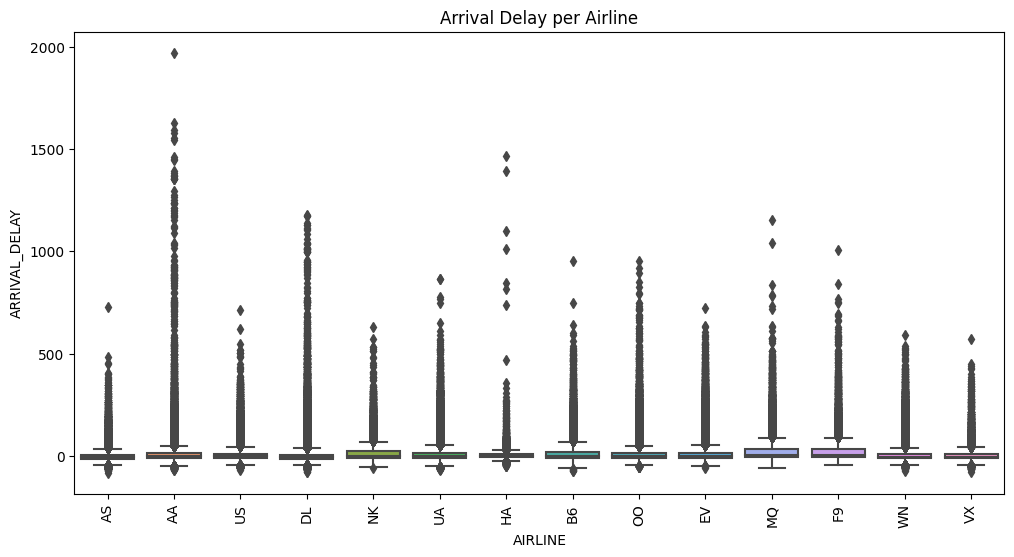

In [14]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='AIRLINE', y='ARRIVAL_DELAY', data=df)

plt.xticks(rotation=90)

plt.title('Arrival Delay per Airline')

plt.show()

## Scatter plot of delay vs. flight distance

<function matplotlib.pyplot.show(close=None, block=None)>

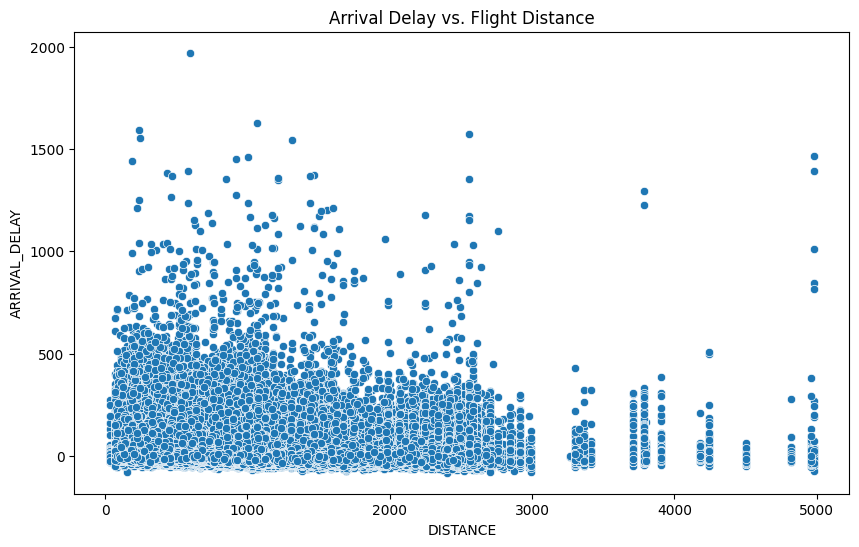

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='DISTANCE', y='ARRIVAL_DELAY', data=df)

plt.title('Arrival Delay vs. Flight Distance')

plt.show

## Bar plot of flight counts by month

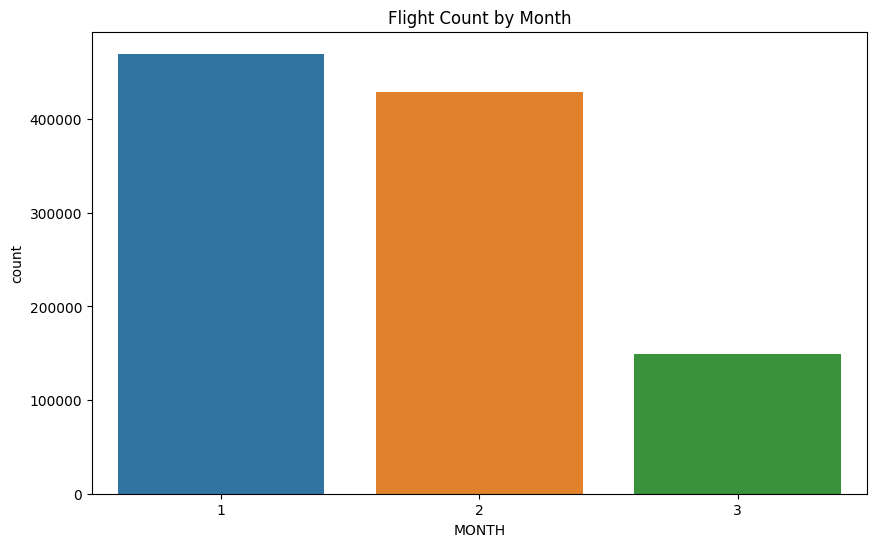

In [16]:
plt.figure(figsize=(10, 6))

sns.countplot(x='MONTH', data=df, order=sorted(df['MONTH'].unique()))

plt.title('Flight Count by Month')

plt.show()

##  Delay Distributions

This block of code uses Seaborn to create a grid of histograms that visualize the distributions of various delay-related variables from the DataFrame df

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='CANCELLATION_REASON', ylabel='Count'>

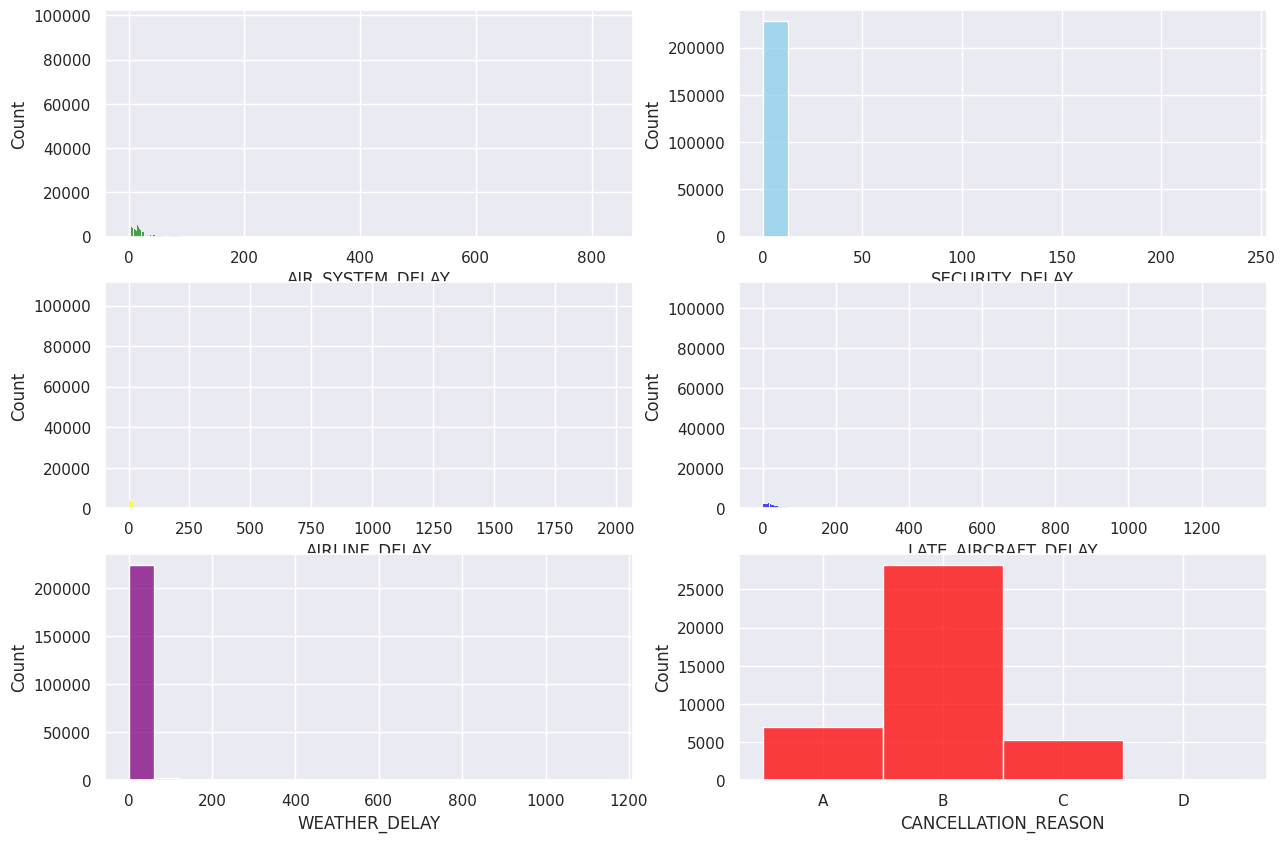

In [17]:
sns.set(style="darkgrid")



fig,axs=plt.subplots(3,2, figsize=(15,10))



sns.histplot(data=df, x="AIR_SYSTEM_DELAY", ax=axs[0,0], color="green") # we have outlier

sns.histplot(data=df, x="SECURITY_DELAY", ax=axs[0,1], color="skyblue") # we have outlier

sns.histplot(data=df, x="AIRLINE_DELAY", ax=axs[1,0], color="yellow") # we have outlier

sns.histplot(data=df, x="LATE_AIRCRAFT_DELAY", ax=axs[1,1], color="blue") # we have outlier

sns.histplot(data=df, x="WEATHER_DELAY", ax=axs[2,0], color="purple") # we have outlier

sns.histplot(data=df, x="CANCELLATION_REASON", ax=axs[2,1], color="red") # we have outlier

##heatmap to visualize the correlation matrix of numerical features

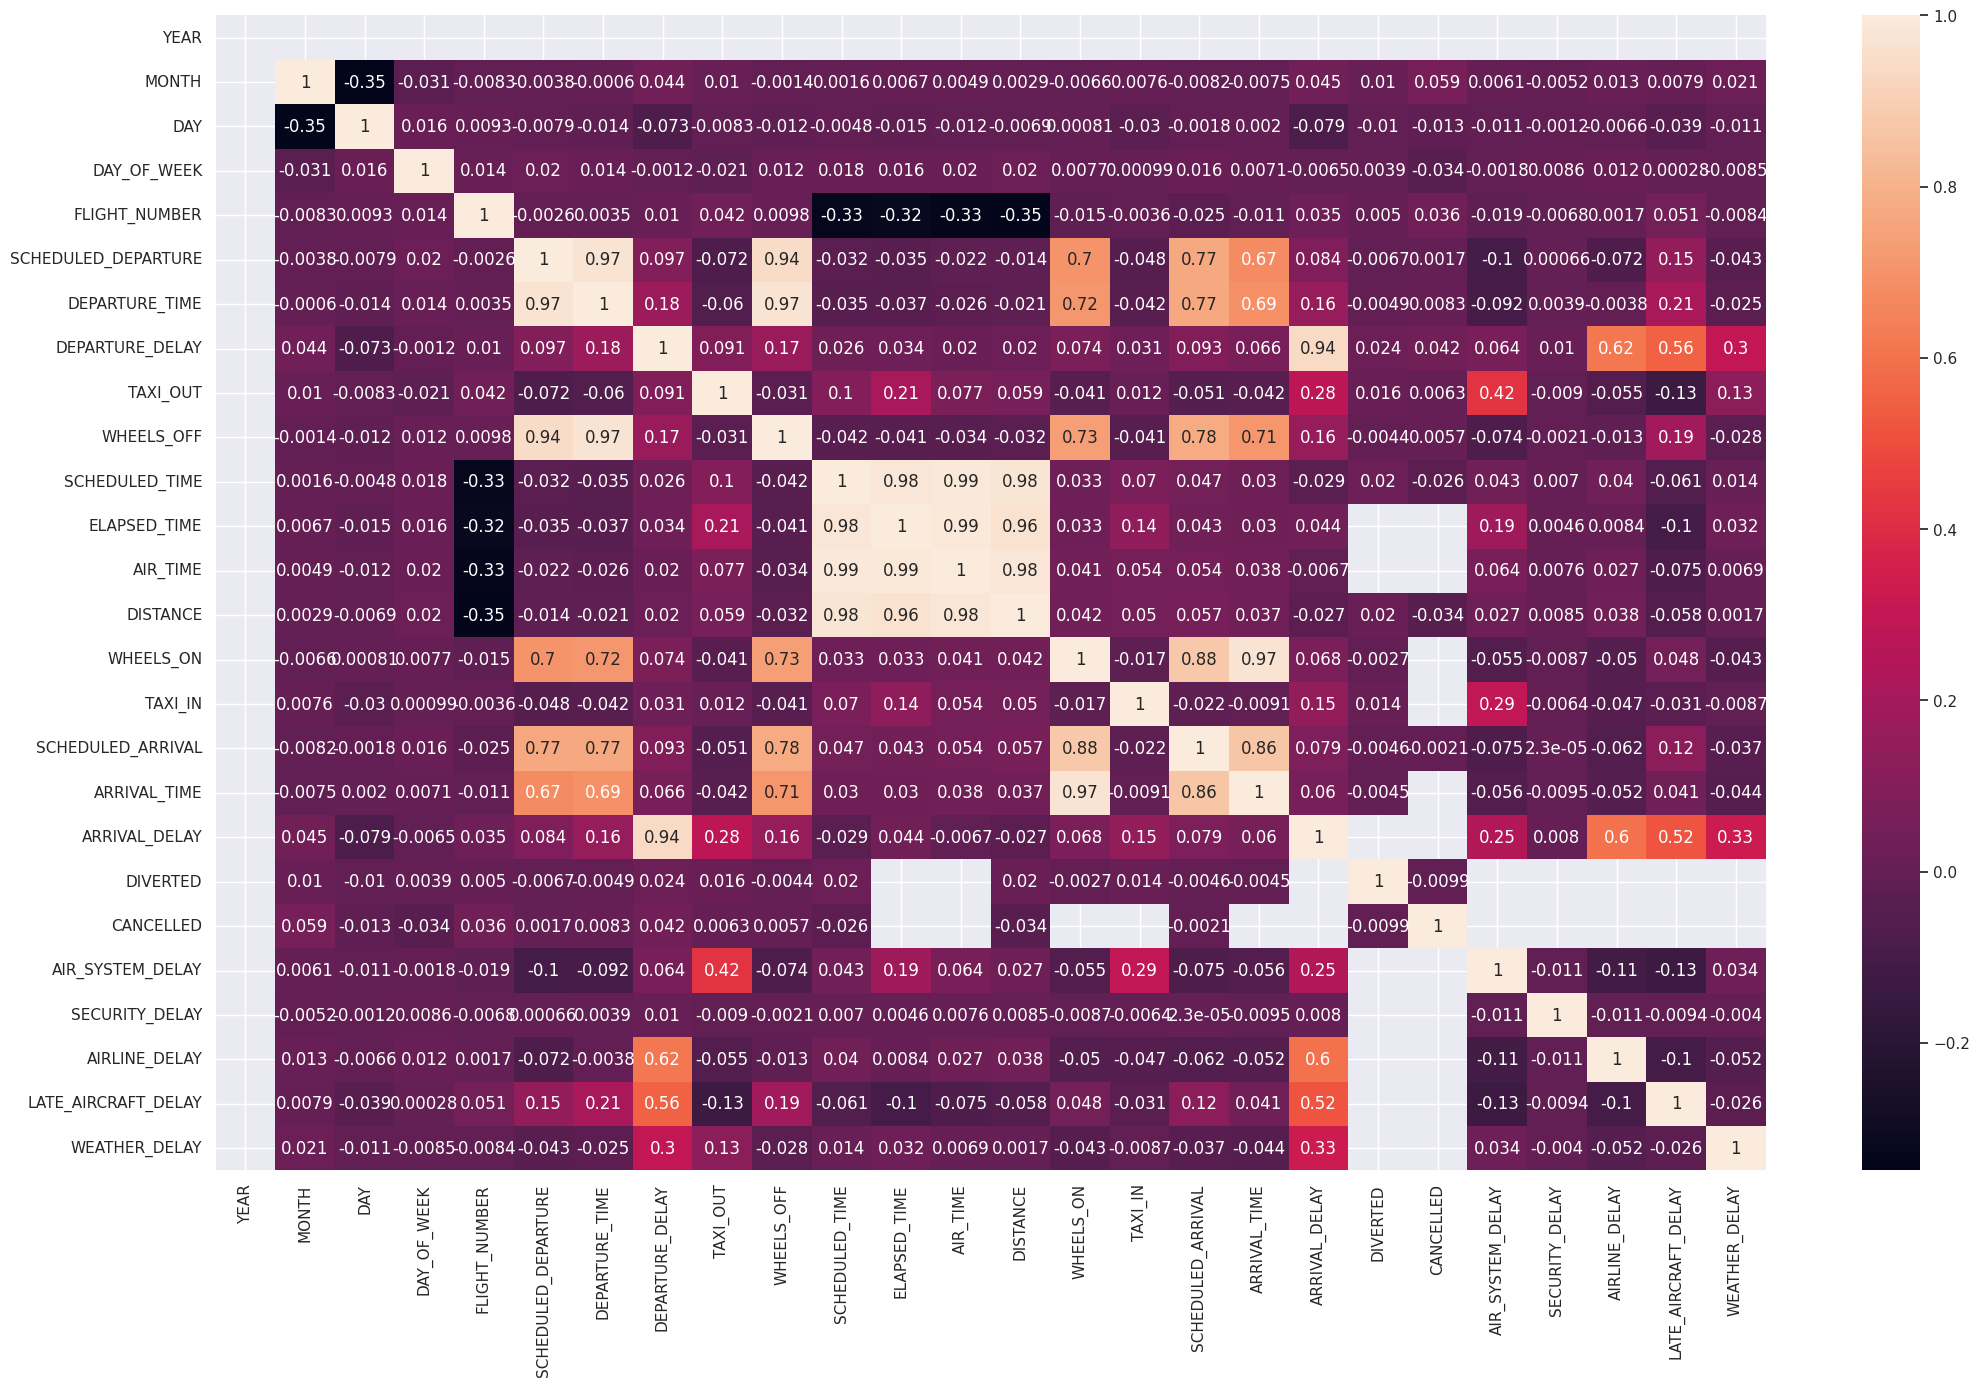

In [43]:
plt.figure(figsize=(25,15))



sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

## removing unnecessary columns

 removing additional columns that are considered unnecessary for the analysis or model.


In [19]:
df_cleaned = df_cleaned.drop(["CANCELLED", "WHEELS_ON", "TAXI_IN", "TAXI_OUT", "FLIGHT_NUMBER"], axis=1)

df_cleaned = df_cleaned.drop(["CANCELLATION_REASON"], axis=1)

df_cleaned = df_cleaned.drop(["WHEELS_OFF"], axis=1)

df_cleaned = df_cleaned.drop(["YEAR"], axis=1)

df_cleaned = df_cleaned.drop(["ARRIVAL_DELAY"], axis=1)

df_cleaned = df_cleaned.drop(["ARRIVAL_TIME"], axis=1)

## Handling missing values

 missing values in key time-related columns (ELAPSED_TIME and AIR_TIME) are filled with the mean value of each respective column.


In [20]:


df_cleaned['ELAPSED_TIME'].fillna(df_cleaned['ELAPSED_TIME'].mean(), inplace=True)

df_cleaned['AIR_TIME'].fillna(df_cleaned['AIR_TIME'].mean(), inplace=True)

/tmp/ipykernel_30/3896541318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['ELAPSED_TIME'].fillna(df_cleaned['ELAPSED_TIME'].mean(), inplace=True)
/tmp/ipykernel_30/3896541318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

creates a new column delay_reason in the DataFrame, which summarizes the reasons for delays in each flight. The reasons are based on several delay-related columns, such as AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY. If any of these columns have a value greater than 0, the corresponding reason is added to the delay_reason field. If no delays are recorded, the entry is marked as "No Delay.


In [21]:
df_cleaned['delay_reason'] = None



def determine_delay_reasons(row):

    reasons = []



    if row['AIR_SYSTEM_DELAY'] > 0:

        reasons.append('Air System Delay')

    if row['SECURITY_DELAY'] > 0:

        reasons.append('Security Delay')

    if row['AIRLINE_DELAY'] > 0:

        reasons.append('Airline Delay')

    if row['LATE_AIRCRAFT_DELAY'] > 0:

        reasons.append('Late Aircraft Delay')

    if row['WEATHER_DELAY'] > 0:

        reasons.append('Weather Delay')



    if reasons:

        return ', '.join(reasons)  # Combine multiple reasons into a string

    else:

        return 'No Delay'



df_cleaned['delay_reason'] = df_cleaned.apply(determine_delay_reasons, axis=1)

This section introduces a new column named target in the df_cleaned DataFrame to classify each flight based on the presence of delays

In [22]:
df_cleaned['target'] = None



def determine_delay_target(row):

    if (row['AIR_SYSTEM_DELAY'] > 0 or

        row['SECURITY_DELAY'] > 0 or

        row['AIRLINE_DELAY'] > 0 or

        row['LATE_AIRCRAFT_DELAY'] > 0 or

        row['WEATHER_DELAY'] > 0):

        return 'Delay'  # Indicates that there is a delay

    else:

        return 'No Delay'  # Indicates no delays



df_cleaned['target'] = df_cleaned.apply(determine_delay_target, axis=1)

Generates a heatmap that visualizes the correlation between the numerical columns in the df_cleaned DataFrame. Correlation is a measure of how closely two variables move in relation to each other, and the heatmap allows for easy identification of strong positive or negative correlations between features.


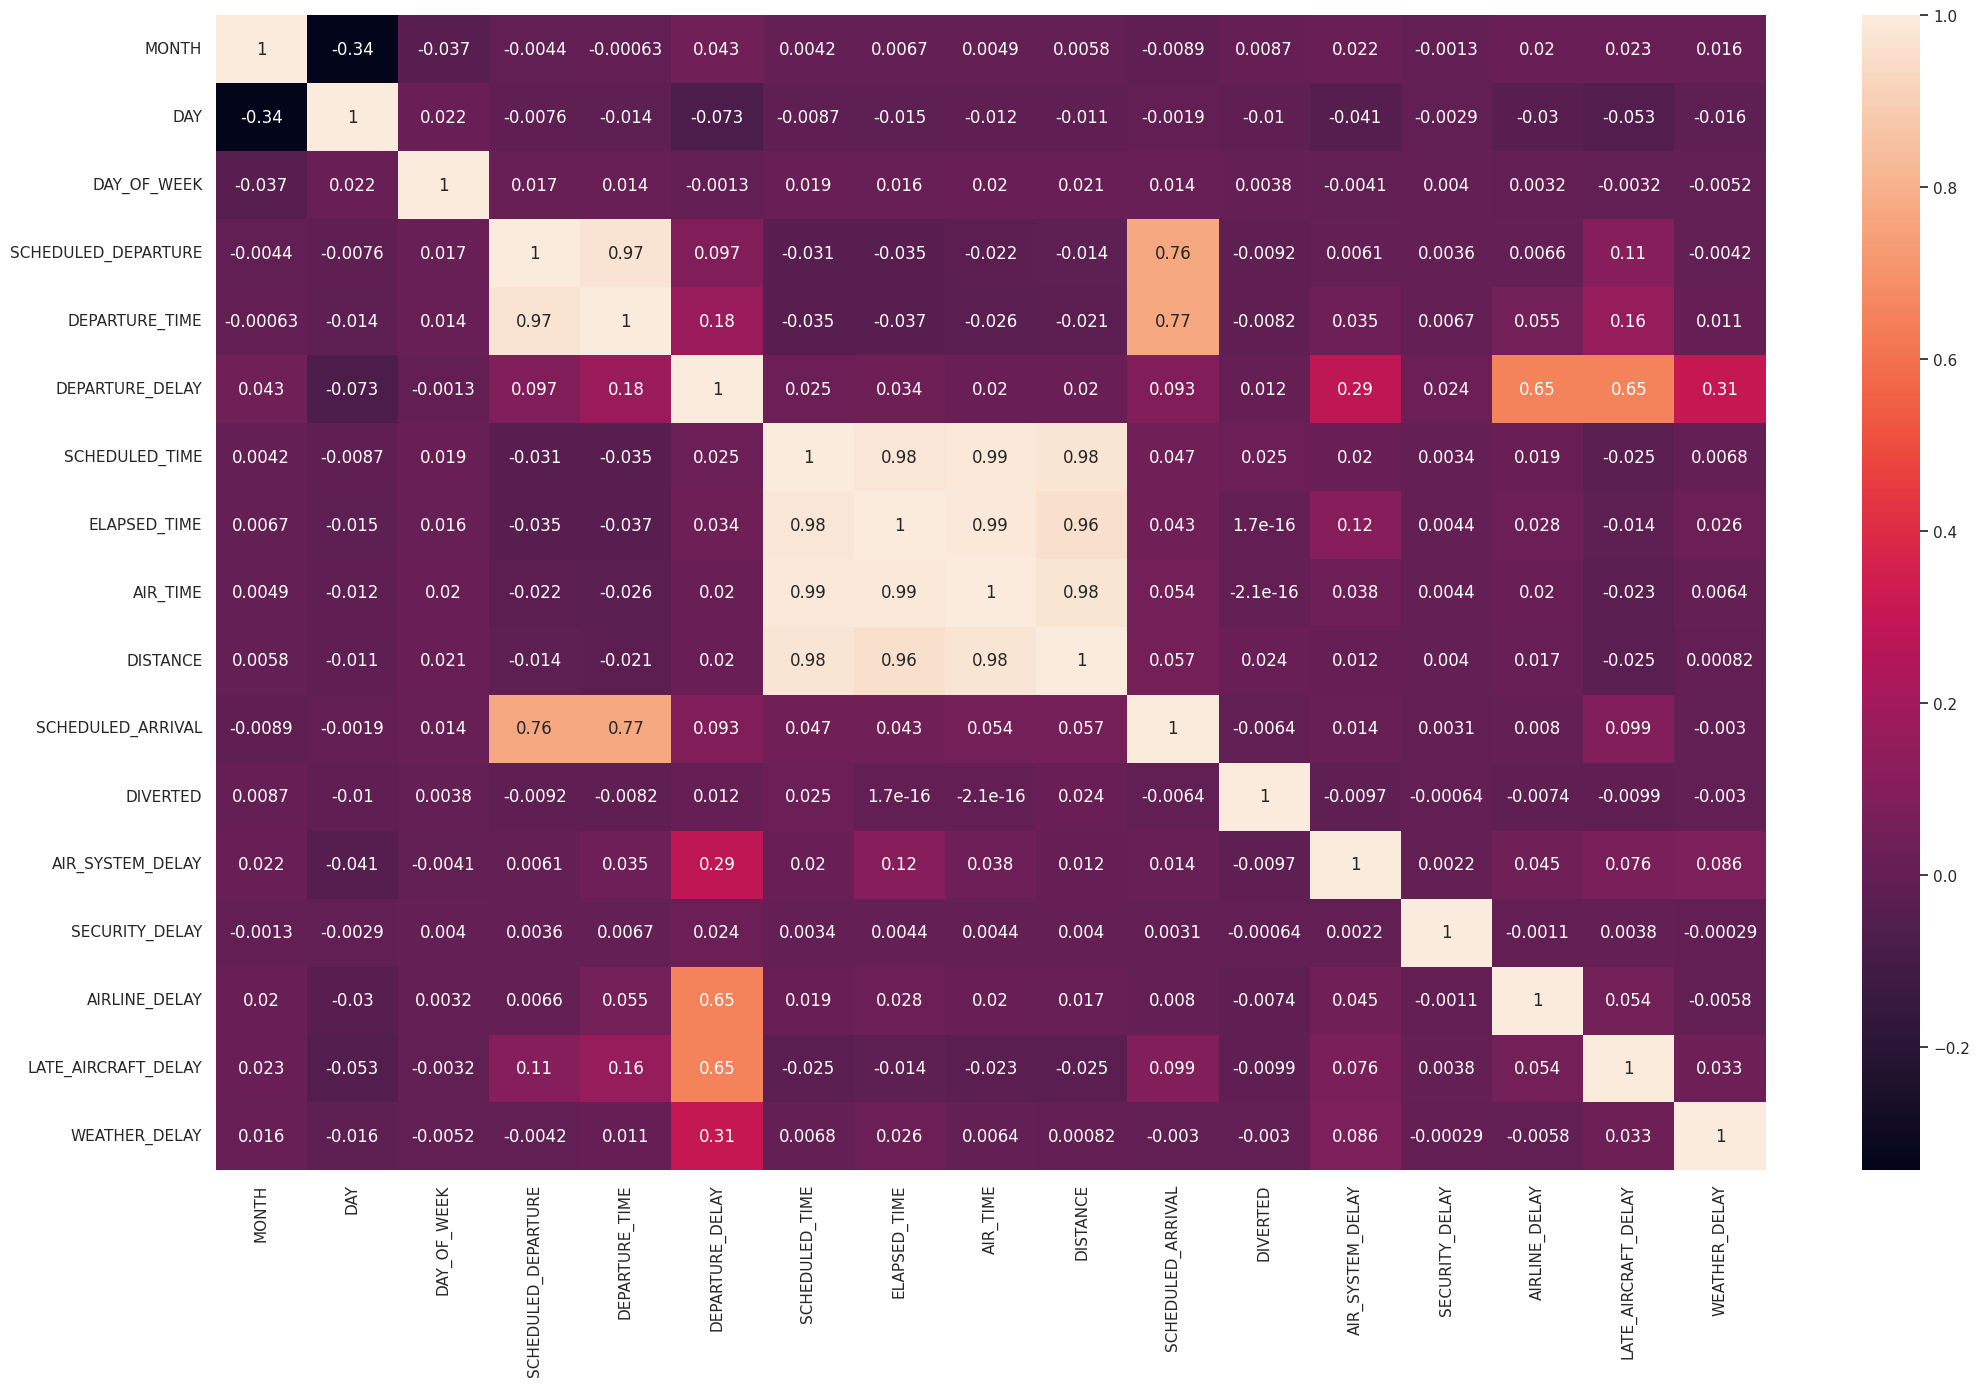

In [23]:
plt.figure(figsize=(25,15))



sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True)

plt.show()

Addresses missing values in the ARRIVAL_DELAY column by calculating the delay based on the difference between the scheduled arrival time (SCHEDULED_ARRIVAL) and the actual arrival time (ARRIVAL_TIME). If ARRIVAL_DELAY is missing for a flight, it is inferred from the available data.

In [24]:
#df_cleaned['ARRIVAL_DELAY'] = df_cleaned['ARRIVAL_DELAY'].fillna(df_cleaned['SCHEDULED_ARRIVAL'] - df_cleaned['ARRIVAL_TIME'])

## prepares the cleaned dataset for machine learning by selecting the feature matrix X and the target variable y.

# Undersampling

Splits the dataset into two groups based on the delay_reason column: flights with no delay (majority class) and flights with delays (minority class). This type of class separation is commonly used when addressing class imbalance in classification problems.



---




In [25]:
df_cleaned.value_counts('target')

target
No Delay    778751
Delay       228528
Name: count, dtype: int64

In [26]:
# Separate majority and minority classes

df_majority = df_cleaned[df_cleaned['target'] == 'No Delay']

df_minority = df_cleaned[df_cleaned['target'] != 'No Delay']


prints the sizes of the majority and minority classes, and it checks whether either class is empty

In [27]:
print(f"Majority class size: {len(df_majority)}")

print(f"Minority class size: {len(df_minority)}")



if len(df_majority) == 0 or len(df_minority) == 0:

    raise ValueError("Either the majority or minority class is empty, cannot proceed with resampling.")

Majority class size: 778751
Minority class size: 228528


This part of the code performs downsampling on the majority class in order to balance the dataset with respect to the minority class. The resample function is used to randomly select samples from the majority class without replacement.

In [28]:
# Downsample the majority class

df_majority_downsampled = resample(df_majority,

                                   replace=False,    # sample without replacement

                                   n_samples=len(df_minority),  # match number of minority class samples

                                   random_state=42)

This line of code combines the downsampled majority class and the minority class into a single balanced DataFrame.


In [29]:
df_balanced = pd.concat([df_majority_downsampled, df_minority])

This line of code is used to shuffle the rows of the balanced DataFrame df_balanced.

In [30]:
# Shuffle the dataset

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


## Splitting Features and Target Variable from the Balanced DataFrame

These lines of code separate the features (input variables) and the target variable (output variable) from the balanced DataFrame df_balanced.

In [31]:
# Now, X and y for RandomForest can be created from this balanced dataset

X_balanced = df_balanced.drop('target', axis=1)

y_balanced = df_balanced['target']


In [32]:
X_balanced_selected = X_balanced.iloc[:, 0:15]

X_balanced_selected.tail()


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED
457051,1,6,2,WN,BWI,IND,1440,1625.0,105.0,110.0,114.0,98.0,516,1630,0
457052,2,15,7,WN,LAS,LAX,2150,2218.0,28.0,65.0,88.0,37.0,236,2255,0
457053,1,21,3,MQ,BIS,DFW,724,720.0,-4.0,161.0,176.0,138.0,977,1005,0
457054,3,6,5,WN,MDW,PHX,1040,1049.0,9.0,235.0,207.0,195.0,1444,1335,0
457055,2,11,3,EV,IAD,CAE,1711,1710.0,-1.0,89.0,92.0,70.0,401,1840,0


This line of code uses the train_test_split function to divide the feature set X_balanced_selected and the target variable y_balanced into training and testing datasets.


In [33]:
X= X_balanced_selected

y= y_balanced


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Identify categorical and numerical columns

In [35]:
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns



Create a column transformer that handles both numerical scaling and categorical encoding


In [36]:






preprocessor = ColumnTransformer(

    transformers=[

        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns

        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns

    ])

# Creating and Fitting a Machine Learning Pipeline

This code creates a machine learning pipeline that integrates preprocessing steps and a classifier, and then fits the pipeline to the training data

In [37]:




pipeline = Pipeline(steps=[

    ('preprocessor', preprocessor),

    ('classifier', RandomForestClassifier(random_state=42))

])



# Fit the pipeline to the training data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

This line of code uses the trained machine learning pipeline to make predictions on the testing dataset.

In [38]:
y_pred = pipeline.predict(X_test)


## Evaluating Model Accuracy

 This line of code calculates and prints the accuracy of the model's predictions compared to the true labels.

In [39]:
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9194197698332823


In [40]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Delay       0.93      0.90      0.92     45634
    No Delay       0.91      0.93      0.92     45778

    accuracy                           0.92     91412
   macro avg       0.92      0.92      0.92     91412
weighted avg       0.92      0.92      0.92     91412

